<a href="https://colab.research.google.com/github/Vignesh-397/Image_Dehazing/blob/main/Updated%20Model/Image_Dehazing_Testing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Testing the model**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**Importing libraries**

In [2]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model


## **Create the VGG model and define loss function**

In [3]:
vgg = VGG19(include_top=False, weights='imagenet')
vgg.trainable = False
content_layer = 'block2_conv2'
loss_model = Model(vgg.input, vgg.get_layer(content_layer).output)

# Perceptual loss using VGG19
def lossVGG(y_true, y_pred, loss_model):
    vggX = loss_model(y_pred)
    vggY = loss_model(y_true)
    return K.mean(K.square(vggX - vggY))

# Total loss
def my_loss(y_true, y_pred):
    mse = MSE(y_true, y_pred)
    return lossVGG(y_true, y_pred, loss_model) + mse

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## **Load the Model**

In [5]:
# Load the entire model
model = load_model('/content/drive/MyDrive/Samsung Prism/dehazing_model_realistic_images.keras', custom_objects={'my_loss': my_loss})

## **Functions to Load and Visualize the results**

In [6]:
# Function to load test images
def load_test_images(test_path):
    imgs = []
    for i in test_path:
        img = cv2.imread(i) / 255.0
        img_resized = cv2.resize(img, (256, 256))
        imgs.append(img_resized)
    return np.array(imgs)

# Function to visualize the results
def visualize_results(original, predicted):
    # Convert images from float to uint8
    original_uint8 = (original * 255).astype(np.uint8)
    predicted_uint8 = (predicted * 255).astype(np.uint8)

    plt.figure(figsize=(10, 5))

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(original_uint8, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Plot predicted image
    plt.subplot(1, 2, 2)
    plt.title("Dehazed Image")
    plt.imshow(cv2.cvtColor(predicted_uint8, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()


## **Loading the test images**

In [7]:
# Load test images
test_hazy_path = glob.glob('/content/drive/MyDrive/Samsung Prism/Real Image Dataset/Test/*')
test_images = load_test_images(test_hazy_path)

## **Performing predictions**

In [8]:
predicted_images = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step


## **Visualize the results**

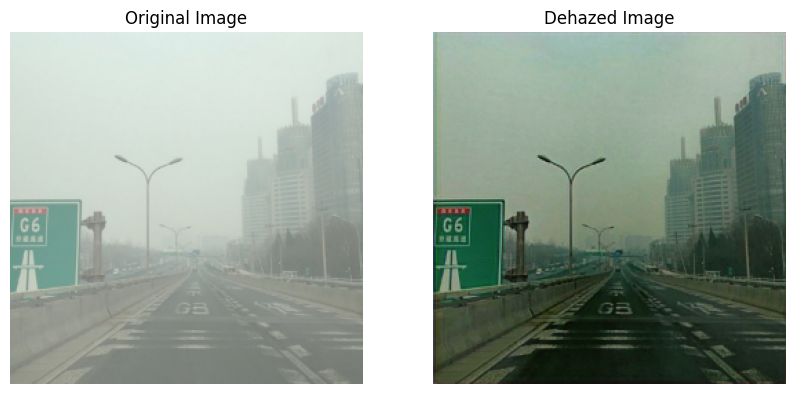

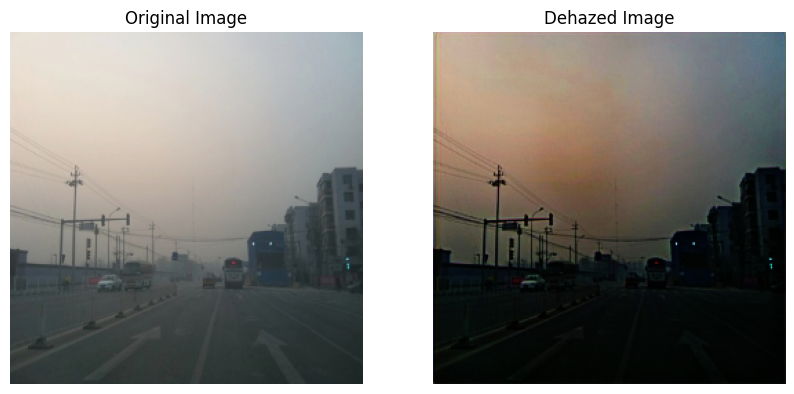

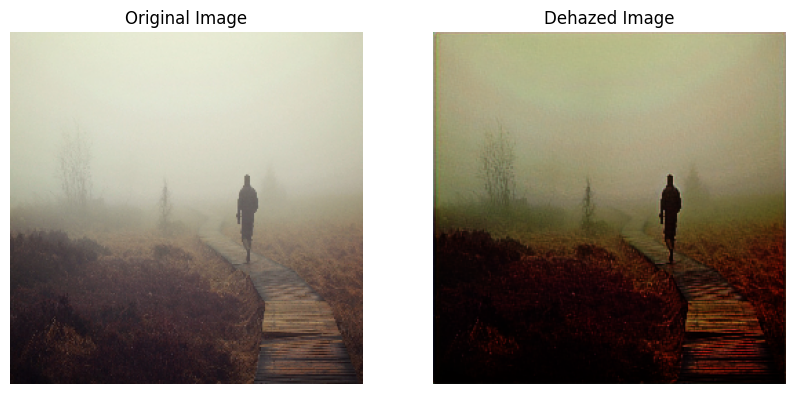

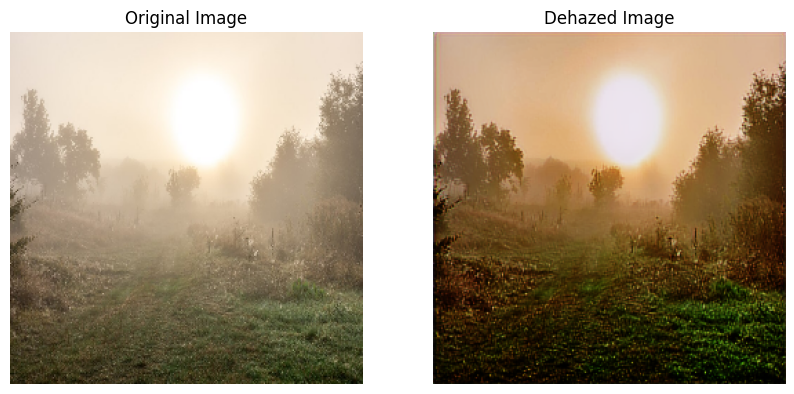

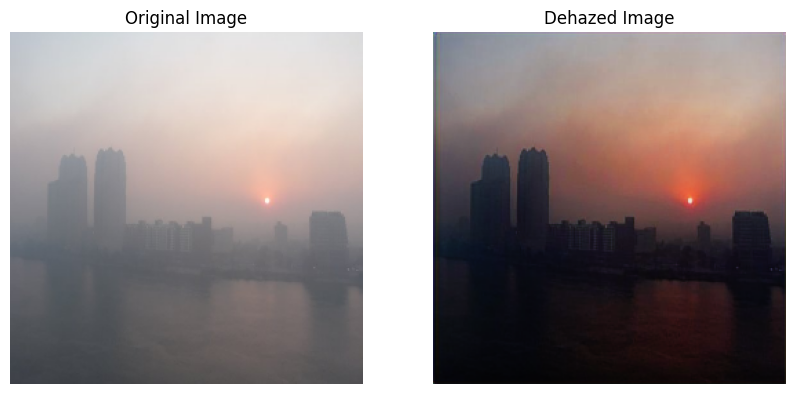

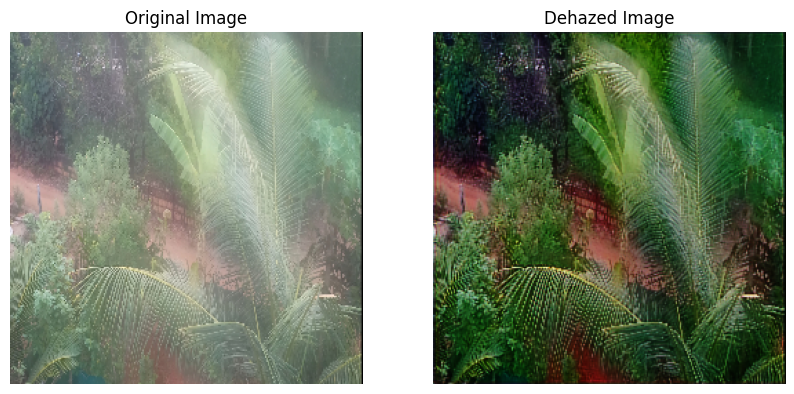

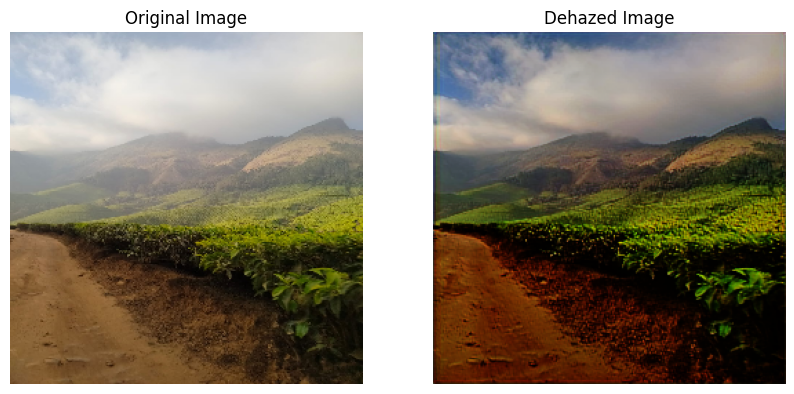

In [9]:
for original, predicted in zip(test_images, predicted_images):
    visualize_results(original, predicted)